# Wrong prediction

In [1]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras

In [1]:
# load in the validation image data

valid_data_dir = '/home/eyan/Desktop/bug_bite/web_scraping/cropped/validation'

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_generator = test_datagen.flow_from_directory(
    valid_data_dir, 
    target_size=(150, 150),
    batch_size=1,shuffle=False,
    class_mode='categorical') 

NameError: name 'tf' is not defined

In [ ]:
# load in model
model_dir = '/home/eyan/Desktop/bug_bite_old/models/8_class_mixed7_79p.h5'

model = tf.keras.models.load_model(model_dir)

In [2]:
# getting the names of the files and the # of samples
imagenames = test_generator.filenames

nb_samples = len(imagenames)

print(nb_samples)

NameError: name 'test_generator' is not defined

In [152]:
# making predictions

predict = model.predict(test_generator, steps=nb_samples)

In [153]:
for p in predict:
    print(p)
    print('\n')

[7.8372608e-08 4.4424091e-02 1.9968993e-05 9.5516109e-01 7.3617827e-07
 3.8404044e-11 3.9390213e-04 9.8543445e-08]


[3.1288079e-22 1.7703901e-18 3.6970993e-15 9.9999249e-01 7.4982977e-06
 9.9675213e-11 3.3357126e-28 7.7504858e-24]


[7.4701120e-30 2.3511485e-23 2.9007774e-24 1.0000000e+00 1.6550644e-14
 1.5279676e-23 0.0000000e+00 1.5767604e-29]


[3.1915906e-27 5.9638220e-17 1.1215818e-18 9.9999928e-01 7.3250931e-07
 8.1777442e-16 7.6754015e-22 4.5780136e-17]


[9.2144560e-19 2.5748718e-17 1.8111194e-14 1.0000000e+00 2.6857705e-09
 2.0411459e-17 1.5869172e-20 1.9661380e-15]


[3.2649797e-01 1.0045615e-03 1.7757555e-06 6.3445336e-01 3.8039476e-02
 2.7835474e-06 7.0500368e-14 4.4940295e-14]


[2.9492528e-35 1.8233277e-28 6.4307841e-28 1.0000000e+00 1.8681557e-20
 6.9533246e-31 6.9053011e-37 4.4172320e-27]


[1.4447685e-25 1.3257960e-07 7.7792217e-15 9.9999988e-01 3.3118877e-13
 2.6247090e-14 3.4735542e-22 1.5939399e-16]


[3.7338893e-17 2.4508297e-16 4.9103101e-19 3.7880405e-21 1.25021

In [154]:
from sklearn.metrics import confusion_matrix
import numpy as np

# to find the largest prob from the softmax output
y_pred = np.argmax(predict,axis=1)
## y_pred = np.rint(predict)

# get the real calss name
y_true = test_generator.classes

# print out the confusion matrix
print(confusion_matrix(y_true, y_pred))

[[0 0 8 0 2 0]
 [1 0 2 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 4 0]
 [0 0 0 2 0 1]]


In [155]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 1, 3, 2, 5, 5, 5, 5, 7, 4, 4])

In [156]:
y_true

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 5, 5, 5, 5, 7, 7, 7],
      dtype=int32)

In [157]:
CLASS_NAMES = ['ants', 'bed_bugs', 'chiggers', 'fleas','mosquitos', 'no_bites', 'spiders',
       'ticks']

In [158]:
short = ['bed_bugs','chiggers','fleas','mosquitos','no_bites','ticks']

Text(0.5, 15.296875, 'Predicted')

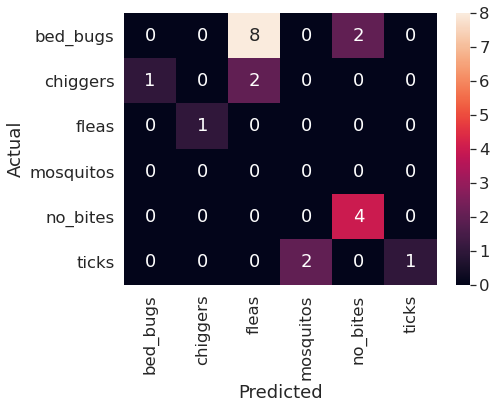

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

confusion_mtx = confusion_matrix(y_true, y_pred) 

x_axis_labels = short# labels for x-axis
y_axis_labels = short # labels for y-axis
sns.set(font_scale=1.5)
# use sns to show heatmap with confusion matrix
sns.heatmap(confusion_mtx, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True)
plt.ylabel("Actual")
plt.xlabel("Predicted")
#sns.heatmap(confusion_mtx, annot=True);

In [145]:
# no of misclassifications
errors = np.where(y_pred != y_true)[0]
# the name of the files where the class. is wrong
wrong_file = {}
for i in errors:
    wrong_file[i]=imagenames[i]

In [146]:
len(wrong_file)

16

In [147]:
# showing a batch in 5x5 grid
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(49):
      ax = plt.subplot(7,7,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [148]:
print([CLASS_NAMES])

[['ants', 'bed_bugs', 'chiggers', 'fleas', 'mosquitos', 'no_bites', 'spiders', 'ticks']]


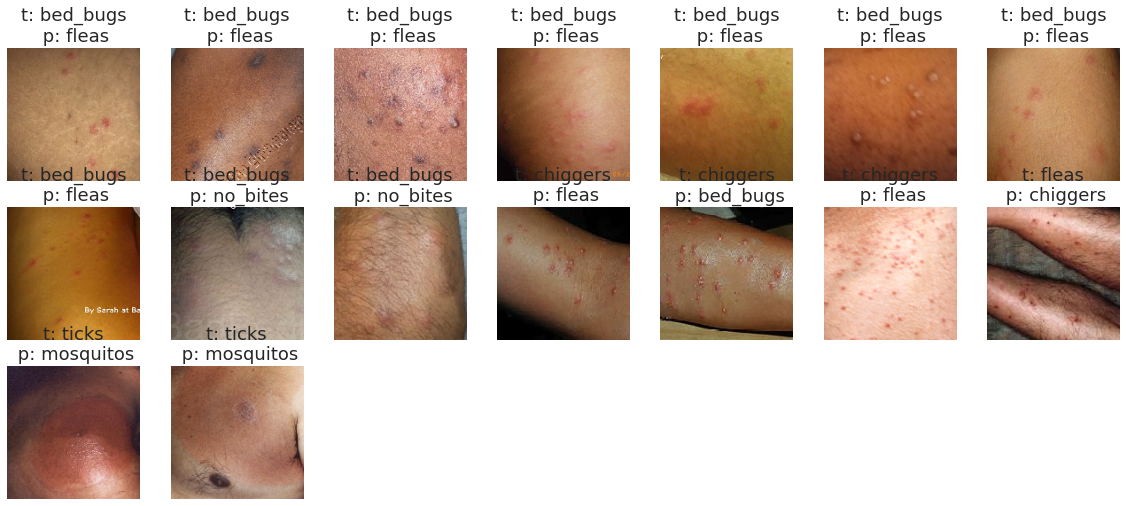

In [149]:
from keras.preprocessing import image
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os

# show a 7x 7 matrix of images from the batch
plt.figure(figsize=(20,20))
n=0

wrong_predict = []
for i, name in wrong_file.items():
    img_path = os.path.join(valid_data_dir,name)
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    ax = plt.subplot(7,7,n+1)
    n+=1
    plt.imshow(img_tensor[0])
    plt.title("t: "+str(CLASS_NAMES[y_true[i]])+"\n p: "+str(CLASS_NAMES[y_pred[i]]))
    plt.axis('off')
    wrong_predict.append(predict[i])
    
plt.show()

In [77]:
# for the image that predicted the wrong result, are they very sure of the predictions?

# make empty arrays to hold the best prob and the 2nd best prob
prob_wrong_pred = []
sec_wrong_pred = []
for p in wrong_predict:
    # prob of the best
    a = np.max(p)
    # the prob of the second best
    b = np.partition(p, -2)[-2]
    print(a,"  ",b)
    print('\n')
    prob_wrong_pred.append(a)
    sec_wrong_pred.append(b)

1.0    1.4978225e-08


0.57514507    0.36491168


0.99831355    0.0016839827


1.0    1.4559793e-08


0.86237836    0.079336986


0.99999905    9.0300074e-07


0.716659    0.14502336


0.99998844    1.1313767e-05


0.9638187    0.03227114


0.61119795    0.3637149


0.99993384    4.1551193e-05


0.5490493    0.3310738


0.99976116    0.00023573962


0.9992507    0.0005063784


0.58614945    0.39672396


0.99981517    0.00018480077


0.7719478    0.22723335


0.7606143    0.23902094


0.9739562    0.017317459


1.0    1.8584724e-11


0.8029903    0.11454626


0.95152885    0.04847073


0.99999845    1.5261944e-06


0.9999995    5.0247314e-07


0.5349754    0.2581337


0.4994386    0.2608003


0.69719136    0.29462945


0.9999752    2.4776105e-05


0.9997912    0.00020537362


0.9979595    0.0014587074


0.99954236    0.00045336655


0.82976705    0.16656116


0.9999989    7.672545e-07


0.70995486    0.28737095


0.9962769    0.0031723904


0.52266586    0.47726163


0.82121456    0.178

In [78]:

# make empty arrays to hold the best prob and the 2nd best prob
prob = []
sec_prob = []
for p in predict:
    a = np.max(p)
    b = np.partition(p, -2)[-2]
    print(a,"  ",b)
    print('\n')
    prob.append(a)
    sec_prob.append(b)

1.0    4.7668923e-16


1.0    7.128308e-21


1.0    3.1788364e-11


1.0    1.2187265e-13


1.0    7.278785e-12


1.0    2.6581227e-13


1.0    6.0851445e-16


0.9999989    7.672545e-07


0.99999964    3.3253033e-07


1.0    9.862002e-14


1.0    1.12225385e-08


0.99996674    1.6552774e-05


0.99999976    2.3784418e-07


1.0    1.1360523e-08


0.9991715    0.00078469666


1.0    3.5225136e-14


0.9999993    6.304233e-07


0.9999883    1.16434285e-05


0.9946636    0.0043750573


0.9999995    5.105612e-07


1.0    4.8641854e-12


1.0    8.712757e-13


1.0    2.637734e-13


1.0    1.5381484e-09


1.0    1.2544475e-09


1.0    2.78329e-08


1.0    5.3114524e-10


1.0    6.6286804e-10


1.0    1.4978225e-08


0.99917287    0.0008023868


0.9276434    0.060145326


0.57514507    0.36491168


0.99999976    1.9836952e-07


0.996804    0.0031959307


0.8782445    0.11576758


0.70078045    0.29919845


1.0    1.1940714e-10


0.61731845    0.37345847


1.0    1.9170263e-09


1.0    4.9056375e-1

In [79]:
print("average:")
print(np.average(prob))
print(np.average(sec_prob))
print()
print("median:")
print(np.median(prob))
print(np.median(sec_prob))

average:
0.9497435
0.041834865

median:
0.9999987
1.0925863e-06


In [80]:
print("average:")
print(np.average(prob_wrong_pred))
print(np.average(sec_wrong_pred))
print()
print("median:")
print(np.median(prob_wrong_pred))
print(np.median(sec_wrong_pred))

average:
0.8569582
0.11712396

median:
0.96888745
0.0247943
